In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu


In [2]:
print('This is fathon v{}'.format(fathon.__version__))

a = np.random.randn(10000)
b = np.random.randn(10000)

a = fu.toAggregated(a)
b = fu.toAggregated(b)

This is fathon v1.3.2


In [3]:
fathon.DCCA

fathon.dcca.DCCA

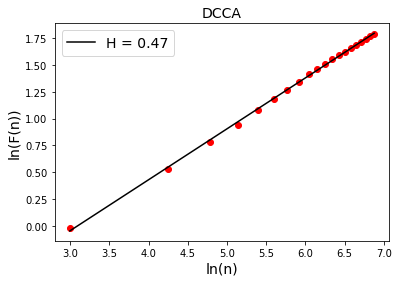

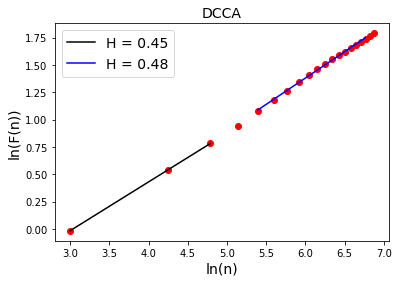

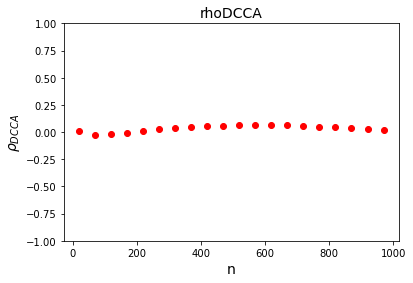

Simulation number 1
Simulation number 2
Simulation number 3
Simulation number 4
Simulation number 5
Simulation number 6
Simulation number 7
Simulation number 8
Simulation number 9
Simulation number 10
Simulation number 11
Simulation number 12
Simulation number 13
Simulation number 14
Simulation number 15
Simulation number 16
Simulation number 17
Simulation number 18
Simulation number 19
Simulation number 20
Simulation number 21
Simulation number 22
Simulation number 23
Simulation number 24
Simulation number 25
Simulation number 26
Simulation number 27
Simulation number 28
Simulation number 29
Simulation number 30
Simulation number 31
Simulation number 32
Simulation number 33
Simulation number 34
Simulation number 35
Simulation number 36
Simulation number 37
Simulation number 38
Simulation number 39
Simulation number 40
Simulation number 41
Simulation number 42
Simulation number 43
Simulation number 44
Simulation number 45
Simulation number 46
Simulation number 47
Simulation number 48
S

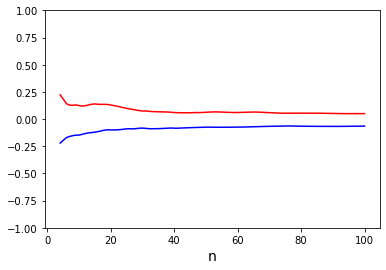

In [5]:
pydcca = fathon.DCCA(a, b)

winSizes = fu.linRangeByStep(20, 1000, step=50)
polOrd = 1

n, F = pydcca.computeFlucVec(winSizes, polOrd=polOrd)

H, H_intercept = pydcca.fitFlucVec()

plt.plot(np.log(n), np.log(F), 'ro')
plt.plot(np.log(n), H_intercept+H*np.log(n), 'k-', label='H = {:.2f}'.format(H))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DCCA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.show()

limits_list = np.array([[20,120], [220,870]], dtype=int)
list_H, list_H_intercept = pydcca.multiFitFlucVec(limits_list)

clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
plt.plot(np.log(n), np.log(F), 'ro')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1, 50)
    plt.plot(np.log(n_rng), list_H_intercept[i]+list_H[i]*np.log(n_rng),
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DCCA', fontsize=14)
plt.legend(loc=0, fontsize=14)
plt.show()

winSizes = fu.linRangeByStep(20, 1000, step=50)
polOrd = 1

n, rho = pydcca.computeRho(winSizes, polOrd=polOrd)

plt.plot(n, rho, 'ro')
plt.ylim(-1, 1)
plt.xlabel('n', fontsize=14)
plt.ylabel('$\\rho_{DCCA}$', fontsize=14)
plt.title('rhoDCCA', fontsize=14)
plt.show()

pythresh = fathon.DCCA()

L = 300
winSizes = fu.linRangeByStep(4, 100, step=1)
nSim = 100
confLvl = 0.95
polOrd = 1

n, cInt1, cInt2 = pythresh.rhoThresholds(L, winSizes, nSim, confLvl, polOrd=polOrd, verbose=True)

plt.plot(n, cInt1, 'r-')
plt.plot(n, cInt2, 'b-')
plt.ylim(-1, 1)
plt.xlabel('n', fontsize=14)
plt.show()